## PyTorch

https://pytorch.org/tutorials/

In [1]:
import torch
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
torch.__version__

'1.0.0.dev20181103'

In [3]:
torch.random.manual_seed(2121)
x = torch.FloatTensor(100,1).uniform_(0, 1)
torch.random.manual_seed(2122)
y = x*2.4+5+torch.FloatTensor(100,1).normal_(0, 0.2)

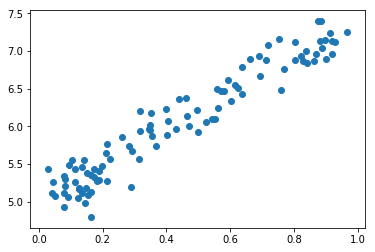

In [4]:
plt.scatter(x,y);

In [5]:
a = torch.autograd.Variable(torch.FloatTensor(1), requires_grad=True)
b = torch.autograd.Variable(torch.FloatTensor(1), requires_grad=True)
def model(x):
    return a*x+b

In [6]:
criterion = torch.nn.MSELoss()
l_rate = 0.01
optimiser = torch.optim.SGD([a,b], lr = l_rate)

In [7]:
epochs = 300
for epoch in range(epochs):
    optimiser.zero_grad()
    outputs = model(x)
    loss = criterion(outputs, y)
    loss.backward()
    optimiser.step()
    if epoch%25==0:
        print('epoch {}, loss {}'.format(epoch,loss.data.numpy()))

epoch 25, loss 11.541034698486328
epoch 50, loss 3.440546989440918
epoch 75, loss 1.0458203554153442
epoch 100, loss 0.33786457777023315
epoch 125, loss 0.12856265902519226
epoch 150, loss 0.06667640805244446
epoch 175, loss 0.048370715230703354
epoch 200, loss 0.042949218302965164
epoch 225, loss 0.04133737087249756
epoch 250, loss 0.04085230827331543
epoch 275, loss 0.04070098325610161
epoch 300, loss 0.04064882546663284


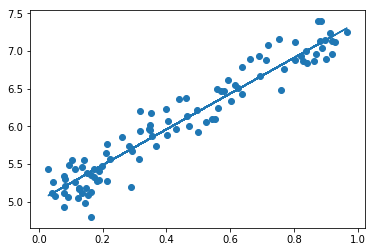

In [8]:
plt.scatter(x,y)
plt.plot(x.numpy(),model(x).detach().numpy())

In [17]:
a.item(),b.item()

(2.372457265853882, 5.0105462074279785)

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
clf = LinearRegression()

In [11]:
clf.fit(x.numpy(),y.numpy())

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

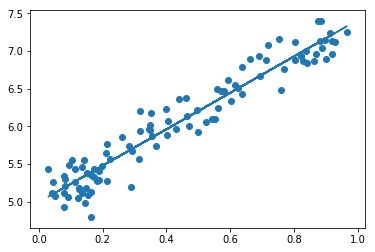

In [12]:
plt.scatter(x,y)
plt.plot(x.numpy(),clf.predict(x.numpy()))